In [130]:
'''
Goal of this project is to predict median housing prices in California districts

X: the district number
y: the meadian housing price of that district

Concepts learned: Understanding data in Pandas dataframes, using matplotlib to understand data,
cleaning data (Pipelines, ColumnTransformer, One hot encoding, NaNs, normalization), models in sklearn 
(linear regression, decision trees, RandomForests), understanding error (mse and rmse), cross validation techniques (k-fold),
hyperparamter tuning using GridSearchCV (max_leaf_nodes, max_depth, n_estimators...))

'''

'\nGoal of this project is to predict median housing prices in California districts\n\nX: the district number\ny: the meadian housing price of that district\n\n'

In [131]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import os
import tarfile
import urllib
%matplotlib inline

In [132]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [133]:
fetch_housing_data()

In [134]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    read_csv = pd.read_csv(csv_path)
    return read_csv

In [135]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [136]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [137]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DDCB1F0C8>,
      dtype=object)

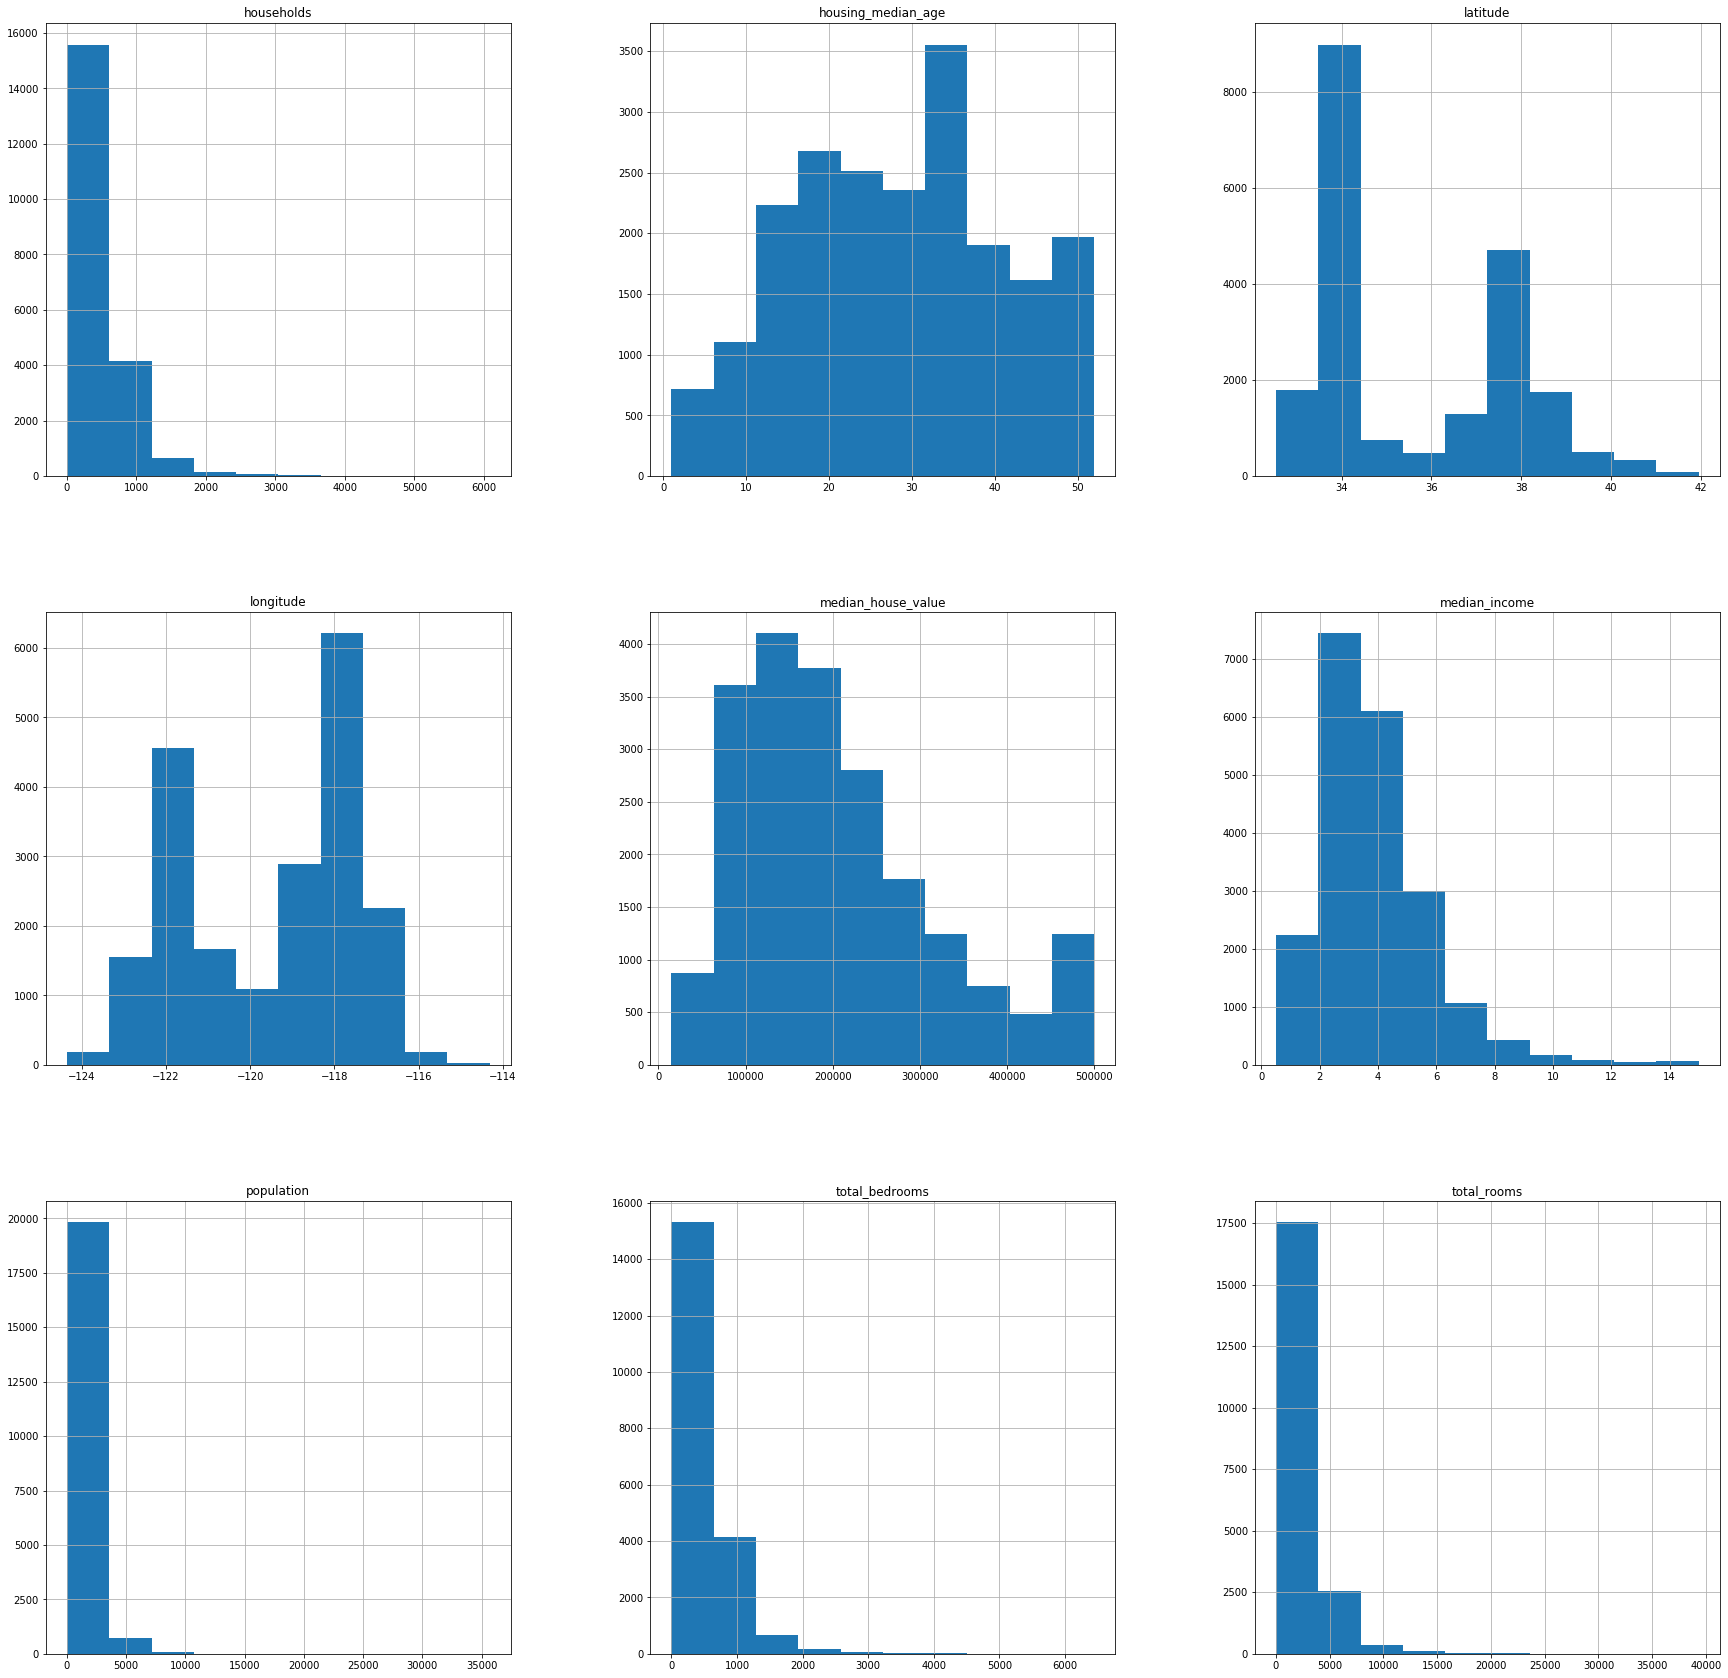

In [138]:
housing.hist(figsize = (30,30)) #Plots number of examples (vertical) vs the value of the respective feature (horizontal)

In [139]:
train_set, test_set = train_test_split(housing, test_size = 0.2)

In [140]:
print("Length of training set: " + str(len(train_set)))
print("Length of testing set: " + str(len(test_set)))

Length of training set: 16512
Length of testing set: 4128


'\nalpha: a parameter that fades less dense areas of scatterplot; allows users to visualize dense areas easier\n'

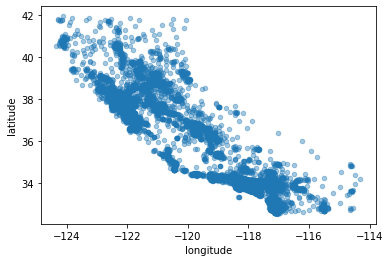

In [141]:
#We can visualize the data uing matplotlib
housing = train_set
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4)
'''
alpha: a parameter that fades less dense areas of scatterplot; allows users to visualize dense areas easier
'''

'\ns: value of the radius of a circle (takes in a series of numbers as a list and makes the dots proprtional to the value);\nin this case, the larger the dot, the bigger the district population\n\nc: coloring of the dots; takes in a series of numbers and color codes using cmap; cmap = "jet" uses the jet color coding\nsystem making blue smaller values and red bigger values\n\n'

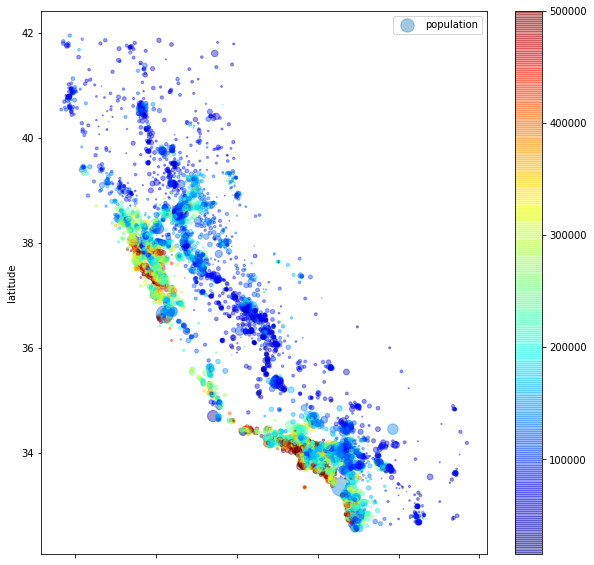

In [142]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, s = housing["population"]/100,
            label = "population", c = housing['median_house_value'], cmap = plt.get_cmap("jet"), 
             figsize = (10, 10), colorbar = True)
'''
s: value of the radius of a circle (takes in a series of numbers as a list and makes the dots proprtional to the value);
in this case, the larger the dot, the bigger the district population

c: coloring of the dots; takes in a series of numbers and color codes using cmap; cmap = "jet" uses the jet color coding
system making blue smaller values and red bigger values

'''

In [143]:
#Let's see how other features correlate linearly with the median housing price; we can use correlation matrices

corr_matrix = housing.corr() #Gives the correlation coefficient of each feature with each other feature
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923661,-0.106068,0.044807,0.070842,0.100748,0.057078,-0.023526,-0.050528
latitude,-0.923661,1.000000,0.008235,-0.036763,-0.069023,-0.110514,-0.073990,-0.073475,-0.140913
housing_median_age,-0.106068,0.008235,1.000000,-0.361892,-0.318484,-0.293932,-0.301643,-0.124073,0.104598
total_rooms,0.044807,-0.036763,-0.361892,1.000000,0.929972,0.858970,0.918724,0.197373,0.133957
total_bedrooms,0.070842,-0.069023,-0.318484,0.929972,1.000000,0.878765,0.980290,-0.006500,0.053043
population,0.100748,-0.110514,-0.293932,0.858970,0.878765,1.000000,0.907494,0.005125,-0.024461
households,0.057078,-0.073990,-0.301643,0.918724,0.980290,0.907494,1.000000,0.014256,0.067963
median_income,-0.023526,-0.073475,-0.124073,0.197373,-0.006500,0.005125,0.014256,1.000000,0.685763
median_house_value,-0.050528,-0.140913,0.104598,0.133957,0.053043,-0.024461,0.067963,0.685763,1.000000


In [144]:
#But we only care about the correlation with all the features and median house values

corr_matrix["median_house_value"]

longitude            -0.050528
latitude             -0.140913
housing_median_age    0.104598
total_rooms           0.133957
total_bedrooms        0.053043
population           -0.024461
households            0.067963
median_income         0.685763
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [145]:
'''
Notice how the data has total_rooms, total_bedrooms and population of the district; this is not very useful because different homes have diff number of
bedrooms; so let's create new features that include this: rooms_per_household, bedrooms_per_household, people_per_house
'''

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["people_per_house"] = housing["population"]/housing["households"]

In [146]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"]

longitude                -0.050528
latitude                 -0.140913
housing_median_age        0.104598
total_rooms               0.133957
total_bedrooms            0.053043
population               -0.024461
households                0.067963
median_income             0.685763
median_house_value        1.000000
rooms_per_household       0.141158
bedrooms_per_household   -0.044060
people_per_house         -0.027596
Name: median_house_value, dtype: float64

In [147]:
housing = train_set.drop("median_house_value", axis = 1) #Can't have what you want to predict in training
housing_labels = train_set["median_house_value"].copy()

In [148]:
#Data cleaning using Pipeline, ColumnTransformer, Imputer, StandardScaler and OneHotEncoder

#Let's first split up numerical and categorical data
housing_num = housing.drop("ocean_proximity", axis = 1)
#Now we define a pipeline: a sequence of preprocessing steps
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
     ("std_scaler", StandardScaler())])
'''
Syntax: Pipeline takes in a list of tuples; each tuple takes in a name and a transformer function
SimpleImputer: gets rid of NaNs and the strategy allows you to pick what to replace nans with (in this case the median)
StandardScaler: makes all numerical values between 0-1
'''
#Now we combine the numerical and the categorical pipelines
num_attribs = list(housing_num) #List of categories that are numerical
num_cats = ["ocean_proximity"] #The one catgeory that is categorical

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), num_cats)
])

'''
Syntax: ColumnTranformer takes in a list of tuples; each tuple needs a name, a function and a list of catgory names to apply
the function on

OneHotEncoder: The ocean_proximity is categorical so we use 1 hot encoding to fix (1 parmeter is hot and rest are cold)
'''

'\nSyntax: ColumnTranformer takes in a list of tuples; each tuple needs a name, a function and a list of catgory names to apply\nthe function on\n\nOneHotEncoder: The ocean_proximity is categorical so we use 1 hot encoding to fix (1 parmeter is hot and rest are cold)\n'

In [149]:
#Apply the full pipeline to housing
housing_final = full_pipeline.fit_transform(housing)

In [150]:
#Let's try some models; first let's use linear regression
lin_reg = LinearRegression()
lin_reg.fit(housing_final, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
#Let's test it out on some of the training samples (Note: .iloc is a way to index Pandas DataFrames)
some_data = housing_final[:5]
some_labels = housing_labels.iloc[:5]
preds = lin_reg.predict(some_data)
print("Predictions: ", preds)

Predictions:  [100436.32744289 252767.22546905 163112.26135729  98092.43006962
 168242.03431481]


In [152]:
print("Ground Truth: ", list(some_labels))

Ground Truth:  [99800.0, 212900.0, 85800.0, 112900.0, 147200.0]


In [153]:
#We can already tell the predictions are awful but we can see how bad using MSE and RMSE
housing_preds = lin_reg.predict(housing_final) 
lin_mse = mean_squared_error(housing_labels, housing_preds)
rmse = np.sqrt(lin_mse)
print("Root mean squared error: ", rmse) #Way too much error, we need better model

Root mean squared error:  68590.07026773243


In [154]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_final, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [155]:
housing_preds = tree_reg.predict(housing_final)
mse = mean_squared_error(housing_labels, housing_preds)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Root mean squared error:  0.0


In [156]:
#Obviously, the model is overfitting on training data so let's use k-fold cross validation
scores_tree = cross_val_score(tree_reg, housing_final, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
#Uses k-fold validation; input: model, train data, labels, type of error and number of folds
tree_rmse_score = np.sqrt(-scores)
print("DecisionTree mean rmse over 10 folds: ", tree_rmse_score.mean())

DecisionTree mean rmse over 10 folds:  71811.11627376091


In [157]:
#Let's compare it to Linear regression
scores_lin_reg = cross_val_score(lin_reg, housing_final, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_score = np.sqrt(-scores_lin_reg)
print("Linear regression mean rmse over 10 folds: ", lin_rmse_score.mean()) #Does better than DecisionTree

Linear regression mean rmse over 10 folds:  68938.33175580767


In [158]:
#Final model: RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_final, housing_labels)
forest_housing_preds = forest_reg.predict(housing_final)
mse = mean_squared_error(housing_labels, forest_housing_preds)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse) #Much better

Root mean squared error:  18721.93560216625


In [159]:
#Let's try k-fold for consistency
scores_forest = cross_val_score(forest_reg, housing_final, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_score = np.sqrt(-scores_forest)
print("RandomForest mean rmse over 10 folds: ", forest_rmse_score.mean())

RandomForest mean rmse over 10 folds:  49981.490509267926


In [160]:
#Clearly the RandomForest model is the best, but it is not great on the cross-validation; let's tune some hyperparameters

In [161]:
#Grid search is an easy way to tune hyperparameters kind of like Tensorboard
help(RandomForestRegressor)
#Let's experiment with n_estimators, max_depth, max_features, max_leaf_nodes and bootstrap

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_est

In [162]:
#We need a list of dictionaries for GridSearch to choose certain hyperparameters
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8], 'max_depth':[5,10,15,20]},
    {'bootstrap': [False], 'n_estimators': [5, 20], 'max_leaf_nodes':[5, 30, 50]},
    {'n_estimators': [6, 12, 18], 'max_leaf_nodes':[5, 50, 500], 'max_depth':[4,16,32,64]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(housing_final, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [5, 10, 15, 20],
                     

In [163]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [164]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

83922.37832414123 {'max_depth': 5, 'max_features': 2, 'n_estimators': 3}
75595.72413269419 {'max_depth': 5, 'max_features': 2, 'n_estimators': 10}
75122.92678256733 {'max_depth': 5, 'max_features': 2, 'n_estimators': 30}
71037.36509331239 {'max_depth': 5, 'max_features': 4, 'n_estimators': 3}
68201.31688639682 {'max_depth': 5, 'max_features': 4, 'n_estimators': 10}
66544.6477865785 {'max_depth': 5, 'max_features': 4, 'n_estimators': 30}
67830.65722487652 {'max_depth': 5, 'max_features': 6, 'n_estimators': 3}
64391.753907339364 {'max_depth': 5, 'max_features': 6, 'n_estimators': 10}
63848.67907771638 {'max_depth': 5, 'max_features': 6, 'n_estimators': 30}
65740.24129748123 {'max_depth': 5, 'max_features': 8, 'n_estimators': 3}
63533.90178006465 {'max_depth': 5, 'max_features': 8, 'n_estimators': 10}
62949.72069726562 {'max_depth': 5, 'max_features': 8, 'n_estimators': 30}
66640.58462360881 {'max_depth': 10, 'max_features': 2, 'n_estimators': 3}
59731.695817255175 {'max_depth': 10, 'max_

In [165]:
#Our best model was: 49617.718080307626 {'max_depth': 20, 'max_features': 6, 'n_estimators': 30}

In [167]:
#Now let's use out test set
X_test = test_set.drop("median_house_value", axis = 1)
y_test = test_set["median_house_value"].copy()
X_test["rooms_per_household"] = X_test["total_rooms"]/X_test["households"]
X_test["bedrooms_per_household"] = X_test["total_bedrooms"]/X_test["households"]
X_test["people_per_house"] =X_test["population"]/X_test["households"]
X_test_final = full_pipeline.transform(X_test)

In [168]:
final_preds = final_model.predict(X_test)

ValueError: could not convert string to float: 'NEAR BAY'